In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum().sum()

0

<AxesSubplot:>

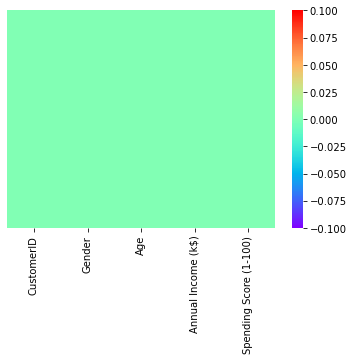

In [6]:
sbn.heatmap(df.isnull(),yticklabels=False,cmap='rainbow')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
df=df.replace(to_replace='Female',value=0)
df=df.replace(to_replace='Male',value=1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1:]

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
reg=DecisionTreeRegressor(criterion='squared_error',max_depth=5,min_samples_leaf=1,random_state=100)

In [37]:
reg.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, random_state=100)

In [38]:
ypred=reg.predict(xtest)

In [39]:
r2_score(ytest,ypred)

0.3269620865691022